# Hill Activation function

Examine the Hill activation function. 

The components are
- vmax_z: maximum rate of the reaction (ultimately, this will be the rate of transcription of Z)
- K_xz: the activation threshold for X's activation of the reaction
- n_xz: the Hill coefficient (exponent) for X's activation of the reaction
- X: the amount of X in the system

The activation function is

$v_{max} \frac{x^{n_{xz}}}{K_{xz}^{n_{xz}}+x^{n_{xz}}}$

Assuming $v_{max}=1$, plot the activation as a function of X (X from 0 to 2 with step of 0.01) for values of $n_{xz}$ ranging from 1 to 10 with a step of 1. Identify on the plot the location of $K_{xz}=0.5$. Also, identify the location on each line where x=1, because we will be using X=1 for activated X in the model simulation.

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate

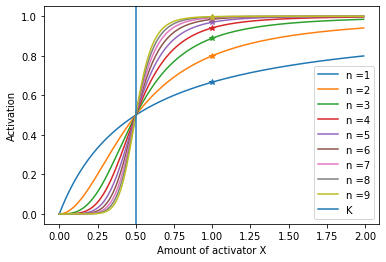

In [2]:
vmax_z = 1;
K_xz = 0.5;
n_xz = 5;

x = np.arange(0,2,0.01)
ns = np.arange(1,10,1)
legs = []
for i in range(ns.size):
    n_xz = ns[i]
    activation = vmax_z* x**n_xz/(K_xz**n_xz + x**n_xz)
    plt.plot( x, activation )
    legs.append( "n =" + str(n_xz) )
plt.axvline( K_xz );
legs.append( 'K')
plt.legend( legs );
plt.gca().set_prop_cycle(None) # this resets the color cycle
for i in range(ns.size):
    n_xz = ns[i]
    activation = vmax_z* 1**n_xz/(K_xz**n_xz + 1**n_xz)
    plt.plot( 1, activation, '*' )
plt.xlabel( 'Amount of activator X')
plt.ylabel( 'Activation');

## Transcription with a single activator

Implement a model of Z, which is activated by X (a parameter) and that degrades. The model function takes as input the time, state variables, and parameters. It should have one state variable, Z, that is activated by a transcription factor X. In this scenario, X is considered an input. There is no differential equation for X, so we treat it as a parameter.

The parameters are
- vmax_z: maximum rate of Z's transcription
- K_xz: the activation threshold for X's activation of Z
- n_xz: the Hill coefficient (exponent) for X's activation of Z
- d_z: the degradation rate constant for Z
- X: the amount of X in the system

The model's activation function is

$v_{max} \frac{x^{n_{xz}}}{K_{xz}^{n_{xz}}+x^{n_{xz}}}$

and $\frac{dZ}{dt}$ depends on activation and degradation.

In [3]:
def single_activator( t, statevars, params ):
    z = statevars[0];
    vmax_z = params[0];
    K_xz = params[1];
    n_xz = params[2];
    d_z = params[3];
    x = params[4]

    dydt = np.zeros( (1,) )
    dydt[0] = vmax_z* x**n_xz/(K_xz**n_xz + x**n_xz) - d_z*z;
    return dydt

### Simulate the model

Use $v_{max}=1$, $K_{xz}=0.5$, $n_{xz}=5$, and $d_z=2$. X should be 0 until t=0.5, and 1 thereafter. Simulate from t=0 to t=20 with a time steps of 0.01.

We are going to take extra precautions when we solve this system. We will first simulate the situation before X is on, then start a new simulation with X on. This way, we can guarantee that we have the solution change behaviors at exactly the right time. (The danger is that the solver is so satisfied with the flat solution before X is on, that it takes such big steps that it doesn't notice when X is turned on.)

In [4]:
# Assign each parameter a name by value
vmax_z = 1;
K_xz = 0.5;
n_xz = 5;
d_z = 2;

# Set up parameters so that X is off, and then X is on
time_x_on = 0.5
params_off = (vmax_z, K_xz, n_xz, d_z,0);
params_on = (vmax_z, K_xz, n_xz, d_z,1);

# Make versions of the model with X off and X on
mf_off = lambda t,y : single_activator(t,y, params_off)
mf_on = lambda t,y : single_activator(t,y, params_on)

# Simulate first with X off, then turn X on.
sol1 = scipy.integrate.solve_ivp( fun=mf_off, t_span=(0,time_x_on), y0=(0,), 
                                t_eval=np.arange(0,time_x_on,.01) )
sol2 = scipy.integrate.solve_ivp( fun=mf_on, t_span=(time_x_on,20), y0=sol1.y[:,-1], 
                                t_eval=np.arange(time_x_on,20,.01) )

### Plot the simulation
Plot X over time in an upper subplot and Z over time in a lower subplot.

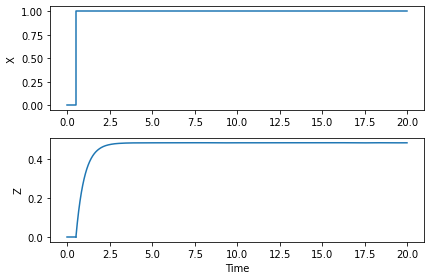

In [5]:
plt.subplot( 2, 1, 1)
plt.plot( [sol1.t[0],time_x_on,time_x_on,sol2.t[-1]], [0,0,1,1] )
plt.ylabel( "X")
plt.subplot( 2, 1, 2 )
plt.plot(sol1.t, sol1.y.T); #Simulation before signal on
plt.gca().set_prop_cycle(None) # this resets the color cycle
plt.plot(sol2.t, sol2.y.T); #Simulation after signal on
plt.xlabel( 'Time')
plt.ylabel( "Z")
plt.tight_layout()

### Simulate and plot the model for varying Hill coefficients
For $n_{xz}$ from 1 to 10 (with step of 1), simulate the model (with all other info as above). Plot all simulation outputs on the same plot, and use a legend to label the value of $n_{xz}$ for each line.

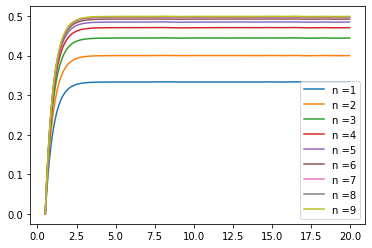

In [6]:
x = np.arange(0,2,0.01)
ns = np.arange(1,10,1)
legs = []
for i in range(ns.size):
    n_xz = ns[i]
    params_off = (vmax_z, K_xz, n_xz, d_z,0);
    params_on = (vmax_z, K_xz, n_xz, d_z,1);

    mf_off = lambda t,y : single_activator(t,y, params_off)
    mf_on = lambda t,y : single_activator(t,y, params_on)

    sol1 = scipy.integrate.solve_ivp( fun=mf_off, t_span=(0,time_x_on), y0=(0,), 
                                    t_eval=np.arange(0,time_x_on,.01) )
    sol2 = scipy.integrate.solve_ivp( fun=mf_on, t_span=(time_x_on,20), y0=sol1.y[:,-1], 
                                    t_eval=np.arange(time_x_on,20,.01) )    
    plt.plot(sol2.t, sol2.y.T); #Simulation after signal on
    legs.append( "n =" + str(n_xz) )
plt.legend( legs );

# Hill Repression function

Examine the Hill repression function. 

The components are
- vmax_z: maximum rate of the reaction (ultimately, this will be the rate of transcription of Z)
- K_xz: the activation threshold for X's activation of the reaction
- n_xz: the Hill coefficient (exponent) for X's activation of the reaction
- X: the amount of X in the system

The repression function is

$v_{max} \frac{K_{xz}^{n_{xz}}}{K_{xz}^{n_{xz}}+x^{n_{xz}}}$

Assuming $v_{max}=1$, plot the activation as a function of X (X from 0 to 2 with step of 0.01) for values of $n_{xz}$ ranging from 1 to 10 with a step of 1. Identify on the plot the location of $K_{xz}=0.5$. Also, identify the location on each line where x=1, because we will be using X=1 for activated X in the model simulation.

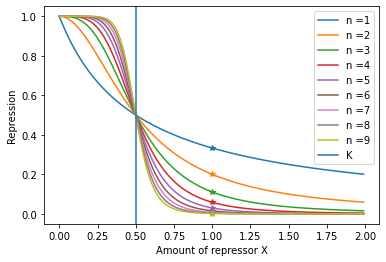

In [10]:
vmax_z = 1;
K_xz = 0.5;
n_xz = 5;

x = np.arange(0,2,0.01)
ns = np.arange(1,10,1)
legs = []
for i in range(ns.size):
    n_xz = ns[i]
    repression = vmax_z* K_xz**n_xz/(K_xz**n_xz + x**n_xz)
    plt.plot( x, repression )
    legs.append( "n =" + str(n_xz) )
plt.axvline( K_xz );
legs.append( 'K')
plt.legend( legs );
plt.gca().set_prop_cycle(None) # this resets the color cycle
for i in range(ns.size):
    n_xz = ns[i]
    repression = vmax_z* K_xz**n_xz/(K_xz**n_xz + 1**n_xz)
    plt.plot( 1, repression, '*' )
plt.xlabel( 'Amount of repressor X')
plt.ylabel( 'Repression');

## Transcription with a single repressor

Implement a model of Z, which is repressed by X (a parameter) and that degrades. The model function takes as input the time, state variables, and parameters. It should have one state variable, Z, that is activated by a transcription factor X. In this scenario, X is considered an input. There is no differential equation for X, so we treat it as a parameter.

The parameters are
- vmax_z: maximum rate of Z's transcription
- K_xz: the activation threshold for X's repression of Z
- n_xz: the Hill coefficient (exponent) for X's repression of Z
- d_z: the degradation rate constant for Z
- X: the amount of X in the system

The model's activation function is

$v_{max} \frac{K_{xz}^{n_{xz}}}{K_{xz}^{n_{xz}}+x^{n_{xz}}}$

and $\frac{dZ}{dt}$ depends on transcription (which can be repressed) and degradation.

In [11]:
def single_repressor( t, statevars, params ):
    z = statevars[0];
    vmax_z = params[0];
    K_xz = params[1];
    n_xz = params[2];
    d_z = params[3];
    x = params[4]

    dydt = np.zeros( (1,) )
    dydt[0] = vmax_z* K_xz**n_xz/(K_xz**n_xz + x**n_xz) - d_z*z;
    return dydt

### Simulate the model

Use $v_{max}=1$, $K_{xz}=0.5$, $n_{xz}=5$, and $d_z=2$. X should be 0 until t=0.5, and 1 thereafter. Simulate from t=0 to t=20 with a time steps of 0.01.

We are going to take extra precautions when we solve this system. We will first simulate the situation before X is on, then start a new simulation with X on. This way, we can guarantee that we have the solution change behaviors at exactly the right time. (The danger is that the solver is so satisfied with the flat solution before X is on, that it takes such big steps that it doesn't notice when X is turned on.)

In [12]:
import scipy.integrate

vmax_z = 1;
K_xz = 0.5;
n_xz = 5;
d_z = 2;

time_x_on = 0.5
params_off = (vmax_z, K_xz, n_xz, d_z,0);
params_on = (vmax_z, K_xz, n_xz, d_z,1);

mf_off = lambda t,y : single_repressor(t,y, params_off)
mf_on = lambda t,y : single_repressor(t,y, params_on)

sol1 = scipy.integrate.solve_ivp( fun=mf_off, t_span=(0,time_x_on), y0=(0,), 
                                t_eval=np.arange(0,time_x_on,.01) )
sol2 = scipy.integrate.solve_ivp( fun=mf_on, t_span=(time_x_on,20), y0=sol1.y[:,-1], 
                                t_eval=np.arange(time_x_on,20,.01) )

### Plot the simulation
Plot X over time in an upper subplot and Z over time in a lower subplot.

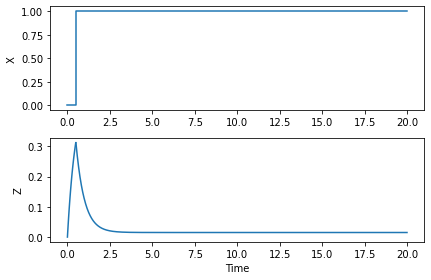

In [13]:
plt.subplot( 2, 1, 1)
plt.plot( [sol1.t[0],time_x_on,time_x_on,sol2.t[-1]], [0,0,1,1] )
plt.ylabel( "X")
plt.subplot( 2, 1, 2 )
plt.plot(sol1.t, sol1.y.T); #Simulation before signal on
plt.gca().set_prop_cycle(None) # this resets the color cycle
plt.plot(sol2.t, sol2.y.T); #Simulation after signal on
plt.xlabel( 'Time')
plt.ylabel( "Z")
plt.tight_layout()

### Simulate and plot the model for varying Hill coefficients
For $n_{xz}$ from 1 to 10 (with step of 1), simulate the model (with all other info as above). Plot all simulation outputs on the same plot, and use a legend to label the value of $n_{xz}$ for each line.

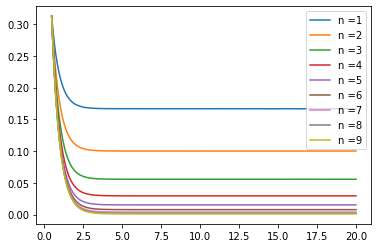

In [14]:
x = np.arange(0,2,0.01)
ns = np.arange(1,10,1)
legs = []
for i in range(ns.size):
    n_xz = ns[i]
    params_off = (vmax_z, K_xz, n_xz, d_z,0);
    params_on = (vmax_z, K_xz, n_xz, d_z,1);

    mf_off = lambda t,y : single_repressor(t,y, params_off)
    mf_on = lambda t,y : single_repressor(t,y, params_on)

    sol1 = scipy.integrate.solve_ivp( fun=mf_off, t_span=(0,time_x_on), y0=(0,), 
                                    t_eval=np.arange(0,time_x_on,.01) )
    sol2 = scipy.integrate.solve_ivp( fun=mf_on, t_span=(time_x_on,20), y0=sol1.y[:,-1], 
                                    t_eval=np.arange(time_x_on,20,.01) )    
    plt.plot(sol2.t, sol2.y.T); #Simulation after signal on
    legs.append( "n =" + str(n_xz) )
plt.legend( legs );